In [10]:
import os
import numpy as np
import numpy.ma as ma
from astropy.table import Table
import matplotlib.pyplot as plt
from disk_mass import calc_mass_curve, fit_mass_curve
from combin_fit_functions import combination_fit
from DRP_rotation_curve import extract_data, extract_Pipe3d_data
from rotation_fitfunctions import find_phi, chi2
import RC_plotting_functions as RC
%matplotlib inline

In [2]:
gal_ID = '7443-12705'
H_0 = 100  # Hubble's Constant in units of h km/s/Mpc
c = 299792.458  # Speed of light in units of km/s

In [3]:
MASS_MAP_FOLDER = r"C:\Users\Lara\Documents\rotationcurves\mangadata\pipe3d\v3_1_1\3.1.1\7443"
VEL_MAP_FOLDER = r"C:\Users\Lara\Documents\rotationcurves\mangadata\analysis\v3_1_1\3.1.0\HYB10-MILESHC-MASTARSSP\7443\12705"
DRP_FILENAME = r"C:\Users\Lara\Documents\rotationcurves\mangadata\redux\v3_1_1\drpall-v3_1_1.fits"

In [4]:
DRP_FILENAME = r"C:\Users\Lara\Documents\rotationcurves\mangadata\redux\v3_1_1\drpall-v3_1_1.fits"
DRP_table = Table.read( DRP_FILENAME, format='fits')


DRP_index = {}

for i in range(len(DRP_table)):
    galaxy_ID = DRP_table['plateifu'][i]

    DRP_index[galaxy_ID] = i


In [19]:
maps = extract_data(VEL_MAP_FOLDER,gal_ID,['Ha_vel', 'r_band', 'Ha_flux', 'Ha_sigma'])
sMass_density, sMass_density_err = extract_Pipe3d_data(MASS_MAP_FOLDER, gal_ID)
i_DRP = DRP_index[gal_ID]
axis_ratio = DRP_table['nsa_sersic_ba'][i_DRP]
incl = np.arccos(np.sqrt((axis_ratio**2 - 0.2**2)/(1-0.2**2))) 
phi = DRP_table['nsa_elpetro_phi'][i_DRP]
z = DRP_table['nsa_z'][i_DRP]
SN_map = maps['Ha_flux'] * np.sqrt(maps['Ha_flux_ivar'])
map_mask = maps['Ha_vel_mask'] + (SN_map < 5)
maps['vmasked'] = ma.array(maps['Ha_vel'], mask=map_mask)
maps['ivarmasked'] = ma.array(maps['Ha_vel_ivar'], mask=map_mask)

shape = maps['vmasked'].shape
scale = (0.5 * z * c / H_0) * 1000 / 206265  # kpc
center = np.unravel_index(ma.argmax(maps['r_band']), shape)
x_center = center[0]
y_center = center[1]
count = 0
phi = find_phi(center, phi, maps['vmasked'])
#param = [incl, phi, x_center, y_center]
print(axis_ratio)

-9.503156
(37, 37)
0.6447036817356814
0.361803


In [6]:
def find_inclination(axis_ratio):
    incl = np.arccos(np.sqrt((np.power(axis_ratio,2) - 0.2**2)/1-0.2**2)) 
    return incl


def find_axis_ratio(incli):
    axis_ratio = np.sqrt((np.power(np.cos(incli),2) * (1-0.2**2)) + 0.2**2)
    return axis_ratio

In [20]:
rho_h0 = -1.5
Rh_0 = 10
vsys = 0

params = rho_h0, Rh_0, axis_ratio, phi, x_center, y_center,  vsys


In [21]:
it = 2


fit_values = np.zeros(it)
for i in range(it):
    fit = combination_fit(sMass_density, sMass_density_err, maps['r_band'], maps['vmasked'], maps['ivarmasked'], map_mask, \
                params, z, gal_ID, "Isothermal")
    fit_values[i]=fits
    x0 = fit[8]
    y0 = fit[9]
    ba = find_axis_ratio(fit[6])
    phi = fit[7]
    rho_h = fit[5]
    Rh = fit[6]
    vsys = fit[10]
    params = rho_h, Rh, ba, phi, x0, y0,  vsys

    
    

finding mass curve
7443-12705 fit did not converge.


TypeError: 'NoneType' object is not subscriptable

In [20]:
x0 = [fits[0][8],fits[1][8],fits[2][8]]
y0 = [fits[0][9],fits[1][9],fits[2][9]]
ba = find_axis_ratio([fits[0][6],fits[1][6],fits[2][6]])
ph = [fits[0][7],fits[1][7],fits[2][7]]
rho_h = [fits[0][4],fits[1][4],fits[2][4]]
Rh = [fits[0][5],fits[1][5],fits[2][5]]
vsys = [fits[0][10],fits[1][10],fits[2][10]]
print("x:",x0)
print("y:",y0)
print("ba:",ba)
print("ph:",ph)
print("rho:",rho_h)
print("Rh:",Rh)
print("vsys:",vsys)

x: [36.60345411183235, 36.588605339687405, 36.618851637845324]
y: [37.67336103902332, 37.70309930289937, 37.67012014365815]
ba: [0.50653338 0.50957016 0.50751204]
ph: [0.6995803930848118, 0.6981889723718819, 0.7003034868331363]
rho: [-1.2600583586436023, -2.251181918629617, -1.2349625672842586]
Rh: [3.8721484883084716, 24.237369984428824, 6.601322539920283]
vsys: [13.920531294365876, 14.424055305389912, 13.700715276867307]


finding mass curve
finding mass curve
finding mass curve
7443-12705 fit did not converge.


C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:387: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:396: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
C:\Users\Lara\Documents\rotationcurves\disk_mass_plotting_functions.py:89: RuntimeWarning: covariance is not positive-semidefinite.
  random_sample = np.random.multivariate_normal(mean=[fit_parameters['Sigma_disk'],
C:\Users\Lara\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


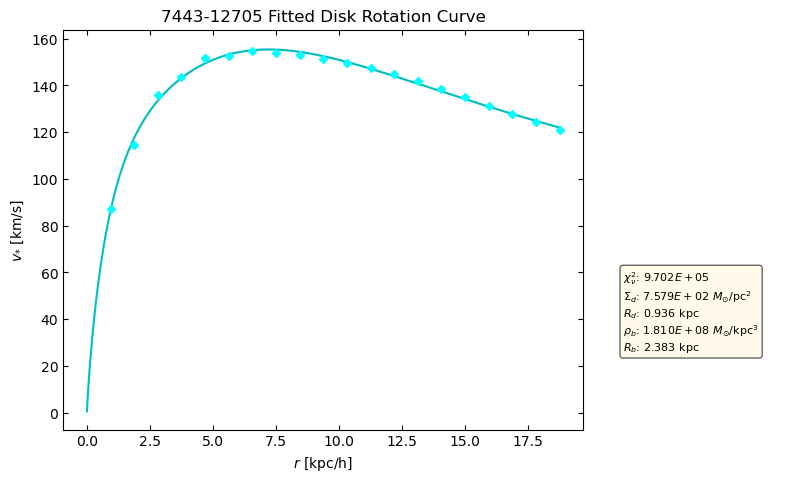

7443-12705 fit did not converge.


TypeError: 'NoneType' object is not subscriptable

In [17]:
fit2 = combination_fit(sMass_density, sMass_density_err, maps['r_band'], maps['vmasked'], maps['ivarmasked'], map_mask, \
                x0, y0, ba, ph, z, vsys, rho_h, Rh, gal_ID)

In [26]:
def find_inclination(axis_ratio):
    incl = np.arccos(np.sqrt((np.power(axis_ratio,2) - 0.2**2)/(1-0.2**2)))
    return incl


def find_axis_ratio(incli):
    axis_ratio = np.sqrt((np.power(np.cos(incli),2) * (1-0.2**2)) + 0.2**2)
    return axis_ratio
find_axis_ratio(find_inclination(0.5))


0.4999999999999999

In [8]:
mass_data_table_iso = calc_mass_curve(sMass_density,
                                          sMass_density_err,
                                          maps['r_band'],
                                          map_mask,
                                          36,
                                          37,
                                          0.50653338,
                                          0.6995803930848118,
                                          z,
                                          gal_ID)
print(mass_data_table_iso['radius','M_star','star_vel'])
#param_outputs = fit_mass_curve(mass_data_table,gal_ID,'bulge')
#print(param_outputs)

finding mass curve
      radius             M_star            star_vel     
------------------ ------------------ ------------------
0.9370803188667071  9.157023275570248  81.17153781362765
1.4056204783000605  9.577617323235588  107.5610834474486
1.8741606377334141  9.738265850624114 112.07533961348251
2.3427007971667675  9.924232384651903 124.17618813003156
 2.811240956600121  10.07269711794585 134.48692623450404
3.2797811160334747  10.16878591031041 139.07564060542933
3.7483212754668283 10.249756388800897  142.8039876446018
 4.216861434900181 10.333441781149611 148.25411947307668
 4.685401594333535 10.394710626728651 150.92543882525794
 5.153941753766889 10.439765791513912  151.5631724258705
               ...                ...                ...
13.587664623567253 10.791005507403579 139.86559224802423
14.056204783000606 10.794815132998467 138.11920598941035
 14.52474494243396  10.79838698894155 136.43311076803116
14.993285101867313 10.800442019173081 134.60250871670257
15.461825261

In [7]:
mass_data_table_NFW = calc_mass_curve(sMass_density,
                                          sMass_density_err,
                                          maps['r_band'],
                                          map_mask,
                                          36,
                                          37,
                                          0.50957016,
                                          0.6981889723718819,
                                          z,
                                          gal_ID)
print(mass_data_table_NFW['radius','M_star','star_vel'])
#param_outputs = fit_mass_curve(mass_data_table,gal_ID,'bulge')
#print(param_outputs)

finding mass curve
      radius             M_star            star_vel     
------------------ ------------------ ------------------
0.9370803188667071  9.157023275570248  81.17153781362765
1.4056204783000605  9.577617323235588  107.5610834474486
1.8741606377334141  9.738265850624114 112.07533961348251
2.3427007971667675  9.924232384651903 124.17618813003156
 2.811240956600121  10.07269711794585 134.48692623450404
3.2797811160334747 10.178833968846648 140.69384492002004
3.7483212754668283 10.249756388800897  142.8039876446018
 4.216861434900181 10.333441781149611 148.25411947307668
 4.685401594333535 10.394710626728651 150.92543882525794
 5.153941753766889  10.44279480588123  152.0926385602539
               ...                ...                ...
13.587664623567253 10.791460153490824 139.93882134960896
14.056204783000606 10.795010150713912 138.15022033243514
 14.52474494243396 10.798469116642957 136.44601153927874
14.993285101867313 10.800634141338136 134.63228457924558
15.461825261

In [6]:
mass_data_table_bur = calc_mass_curve(sMass_density,
                                          sMass_density_err,
                                          maps['r_band'],
                                          map_mask,
                                          36,
                                          37,
                                          0.50751204,
                                          0.7003034868331363,
                                          z,
                                          gal_ID)
print(mass_data_table_bur['radius','M_star','star_vel'])
#param_outputs = fit_mass_curve(mass_data_table,gal_ID,'bulge')
#print(param_outputs)

finding mass curve
      radius             M_star            star_vel     
------------------ ------------------ ------------------
0.9370803188667071  9.157023275570248  81.17153781362765
1.4056204783000605  9.577617323235588  107.5610834474486
1.8741606377334141  9.738265850624114 112.07533961348251
2.3427007971667675  9.924232384651903 124.17618813003156
 2.811240956600121  10.07269711794585 134.48692623450404
3.2797811160334747  10.16878591031041 139.07564060542933
3.7483212754668283 10.249756388800897  142.8039876446018
 4.216861434900181 10.333441781149611 148.25411947307668
 4.685401594333535 10.394710626728651 150.92543882525794
 5.153941753766889 10.439765791513912  151.5631724258705
               ...                ...                ...
13.587664623567253 10.791221906530252  139.9004425211719
14.056204783000606 10.794815132998467 138.11920598941035
 14.52474494243396 10.798393257798754 136.43409544871614
14.993285101867313  10.80058989540435 134.62542658348855
15.461825261

In [12]:
M = Table()

M['iso'] = mass_data_table_iso['M_star']
M['NFW'] = mass_data_table_NFW['M_star']
M['bur'] = mass_data_table_bur['M_star']

In [13]:
print(M)

       iso                NFW                bur        
------------------ ------------------ ------------------
 9.157023275570248  9.157023275570248  9.157023275570248
 9.577617323235588  9.577617323235588  9.577617323235588
 9.738265850624114  9.738265850624114  9.738265850624114
 9.924232384651903  9.924232384651903  9.924232384651903
 10.07269711794585  10.07269711794585  10.07269711794585
 10.16878591031041 10.178833968846648  10.16878591031041
10.249756388800897 10.249756388800897 10.249756388800897
10.333441781149611 10.333441781149611 10.333441781149611
10.394710626728651 10.394710626728651 10.394710626728651
10.439765791513912  10.44279480588123 10.439765791513912
               ...                ...                ...
10.791005507403579 10.791460153490824 10.791221906530252
10.794815132998467 10.795010150713912 10.794815132998467
 10.79838698894155 10.798469116642957 10.798393257798754
10.800442019173081 10.800634141338136  10.80058989540435
10.801676857174613 10.801917899

In [7]:
R = Table()

R['iso'] = mass_data_table_iso['radius']
R['NFW'] = mass_data_table_NFW['radius']
R['bur'] = mass_data_table_bur['radius']
print(R)

NameError: name 'mass_data_table_iso' is not defined

In [9]:
mass_data_table = calc_mass_curve(sMass_density,
                                          sMass_density_err,
                                          maps['r_band'],
                                          map_mask,
                                          37,
                                          37,
                                          axis_ratio,
                                          phi,
                                          z,
                                          gal_ID)

finding mass curve


In [10]:
print(mass_data_table['radius','M_star'])

      radius             M_star      
------------------ ------------------
0.9370803188667071  9.021566748660485
1.4056204783000605    9.3055501011881
1.8741606377334141  9.628443578461361
2.3427007971667675  9.792280729592488
 2.811240956600121  9.920007603783915
3.2797811160334747 10.042724929344043
3.7483212754668283 10.154746605296104
 4.216861434900181 10.209824054852396
 4.685401594333535  10.29500879879121
 5.153941753766889 10.343414090151727
               ...                ...
18.273066217900787 10.799661113038802
 18.74160637733414 10.800749135887523
19.210146536767496  10.80149634766849
 19.67868669620085 10.801873027491235
  20.1472268556342 10.802279857458174
20.615767015067554 10.802577306653788
 21.08430717450091 10.802750253060303
21.552847333934263 10.802827017952655
22.021387493367616 10.802951870848528
 22.48992765280097 10.802986445663006
 22.95846781223432 10.803031595173561
Length = 48 rows


C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:387: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:396: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
C:\Users\Lara\Documents\rotationcurves\disk_mass_plotting_functions.py:89: RuntimeWarning: covariance is not positive-semidefinite.
  random_sample = np.random.multivariate_normal(mean=[fit_parameters['Sigma_disk'],
C:\Users\Lara\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


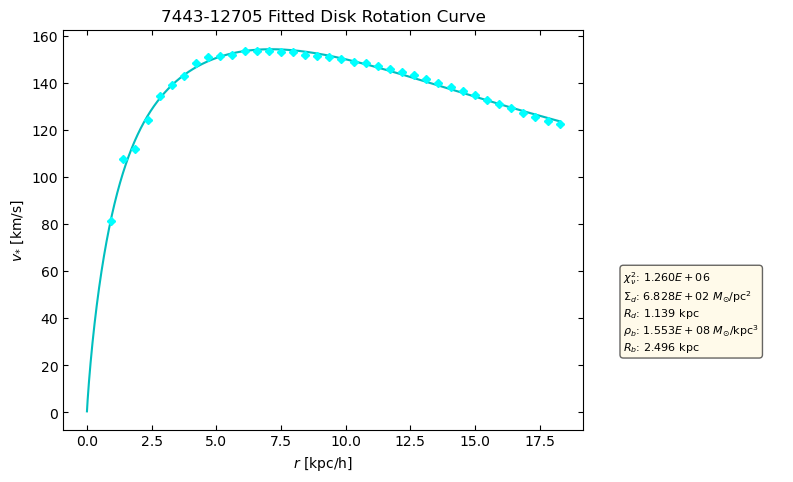

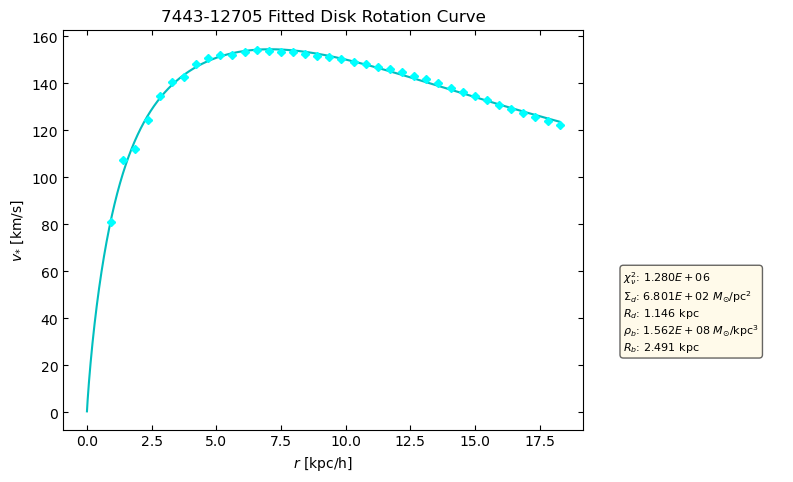

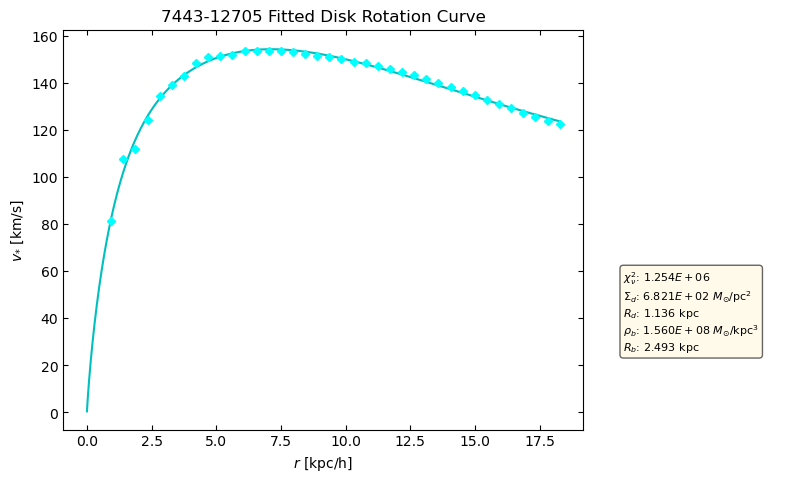

In [11]:
iso_param=fit_mass_curve(mass_data_table_iso,gal_ID,'bulge')
NFW_param=fit_mass_curve(mass_data_table_NFW,gal_ID,'bulge')
Bur_param = fit_mass_curve(mass_data_table_bur,gal_ID,'bulge')

finding mass curve


C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:387: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:396: RuntimeWarning: invalid value encountered in true_divide
  vb_2 = coeff_2 * F / r
C:\Users\Lara\Documents\rotationcurves\disk_mass_plotting_functions.py:89: RuntimeWarning: covariance is not positive-semidefinite.
  random_sample = np.random.multivariate_normal(mean=[fit_parameters['Sigma_disk'],
C:\Users\Lara\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


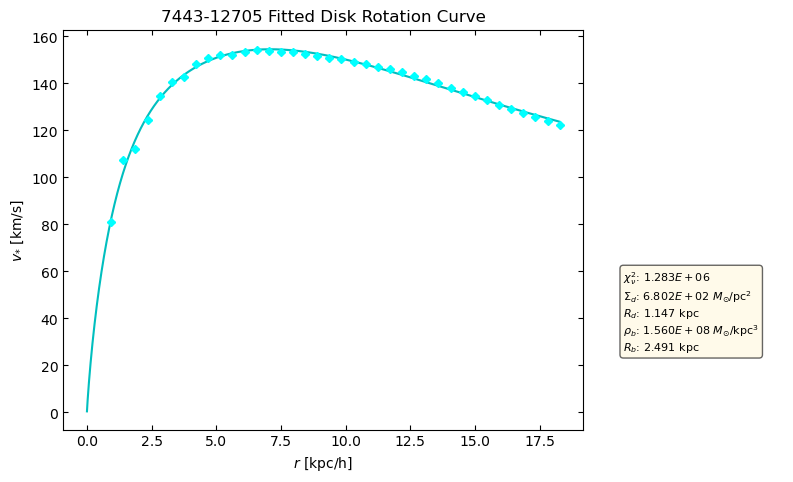

1.0720267260469818
[[-7, 2], [1, 1000], [0.548427950448683, 1.4451326206513049], [0, 6.911503837897546], [31, 41], [32, 42], [-100, 100]]


C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:229: RuntimeWarning: invalid value encountered in double_scalars
  vel = np.sqrt(coeff_2 * F / r)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:347: RuntimeWarning: invalid value encountered in double_scalars
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:505: RuntimeWarning: divide by zero encountered in double_scalars
  vel = v_inf * np.sqrt((1 - ((Rh/r)*np.arctan2(r,Rh))))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:505: RuntimeWarning: invalid value encountered in double_scalars
  vel = v_inf * np.sqrt((1 - ((Rh/r)*np.arctan2(r,Rh))))


---------------------------------------------------
0 [-1.3984359   4.43752098  1.06780461  0.69693069 36.58495593 37.70667654
 14.40252763]


NameError: name 'halo_model' is not defined

In [6]:
fit = combination_fit(sMass_density, sMass_density_err, maps['r_band'], maps['vmasked'], maps['ivarmasked'], map_mask,\
                     [-1.2600583586436023,3.8721484883084716,0.50957016,0.6995803930848118,36,37,13.920531294365876],z,gal_ID,"Isothermal")



C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:229: RuntimeWarning: invalid value encountered in true_divide
  vel = np.sqrt(coeff_2 * F / r)
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:347: RuntimeWarning: invalid value encountered in multiply
  bessel_component = (iv(0, y) * kn(0, y) - iv(1, y) * kn(1, y))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:505: RuntimeWarning: divide by zero encountered in true_divide
  vel = v_inf * np.sqrt((1 - ((Rh/r)*np.arctan2(r,Rh))))
C:\Users\Lara\Documents\rotationcurves\rotation_curve_functions.py:505: RuntimeWarning: invalid value encountered in multiply
  vel = v_inf * np.sqrt((1 - ((Rh/r)*np.arctan2(r,Rh))))


210.62256737482943


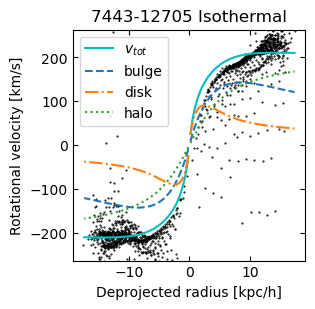

In [9]:
RC.plot_rot_curve()




In [12]:
chi2(maps['vmasked'], maps['ivarmasked'], map_mask, shape, scale, [156000000,2.491, 680,1.147,-1.3984359 , \
                        4.43752098  ,1.06780461 , 0.69693069 ,36.58495593 ,37.70667654,14.40252763], \
                       'Isothermal')

(27457.48851626816, 17.31241394468358)